# TCS Stock Data Analysis

# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Load the Dataset

In [7]:
file_path = '..\TCS Stock Data - Live and Latest Dataset\TCS_stock_history.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\singh\AppData\Local\Temp\ipykernel_4336\549449902.py:1: SyntaxWarning: invalid escape sequence '\T'
  file_path = '..\TCS Stock Data - Live and Latest Dataset\TCS_stock_history.csv'


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


# Data Preprocessing

In [8]:
# Check for null values
print(data.isnull().sum())
# Convert numeric columns if required
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
# Fill any remaining NaN values
data.fillna(method='ffill', inplace=True)

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


C:\Users\singh\AppData\Local\Temp\ipykernel_4336\840052325.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Exploratory Data Analysis (EDA)
### Plotting Close price over time

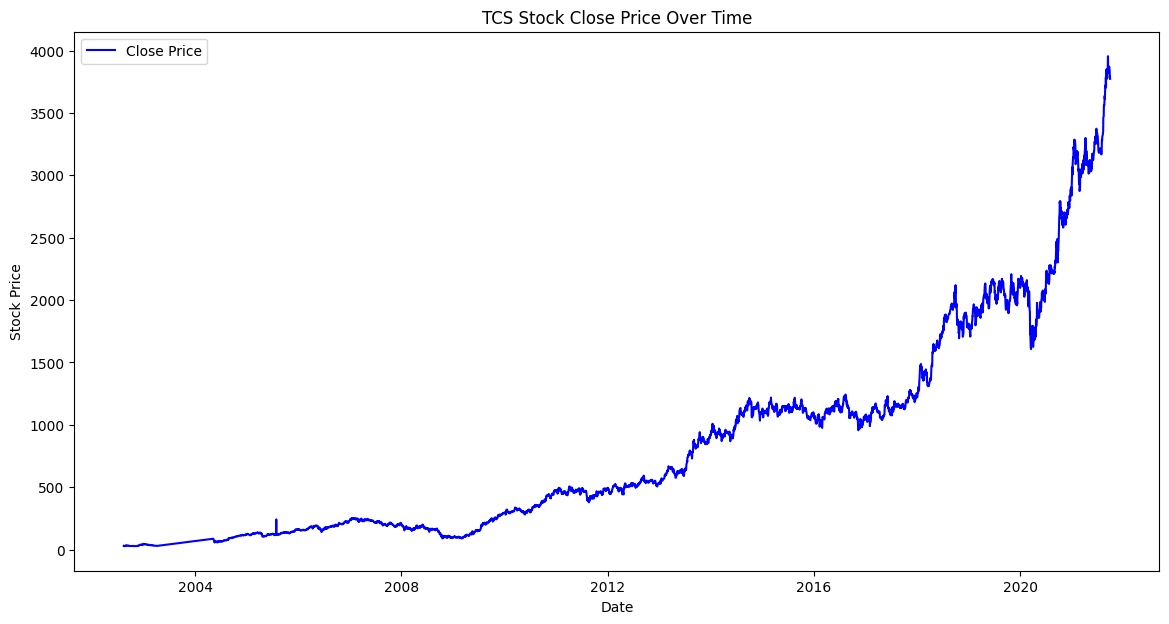

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

### Plot with Moving Averages

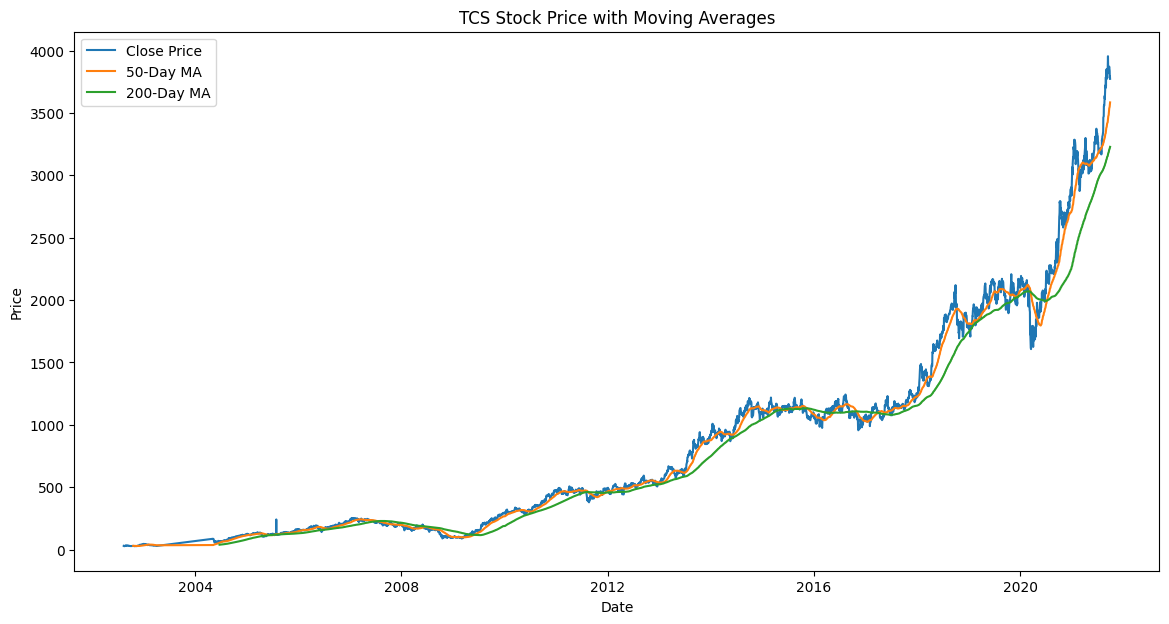

In [10]:
# Calculating 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

# Feature Engineering

In [11]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek
# Lag Features
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True) # Drop rows with NaN values from shifting

# Model Building and Prediction

In [12]:
# Feature selection
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close','Day_of_Week', 'Month']]
y = data['Close']
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 39.04992998516231
R-Squared Score: 0.9999438356582193


# Visualize Model Performance

### Predicted vs Actual Price

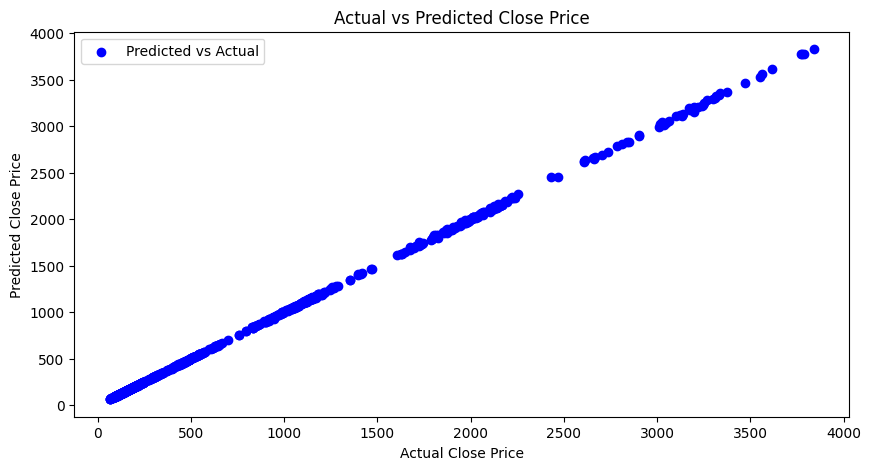

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

In [11]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)

### Correlation of Data

Close           1.000000
High            0.999910
Low             0.999896
Open            0.999776
Prev_Close      0.999729
MA50            0.996858
MA200           0.989252
Date            0.906053
Year            0.904005
Dividends       0.058102
Day_of_Week     0.000202
Day             0.000146
Stock Splits   -0.008033
Month          -0.009692
Volume         -0.198311
Name: Close, dtype: float64


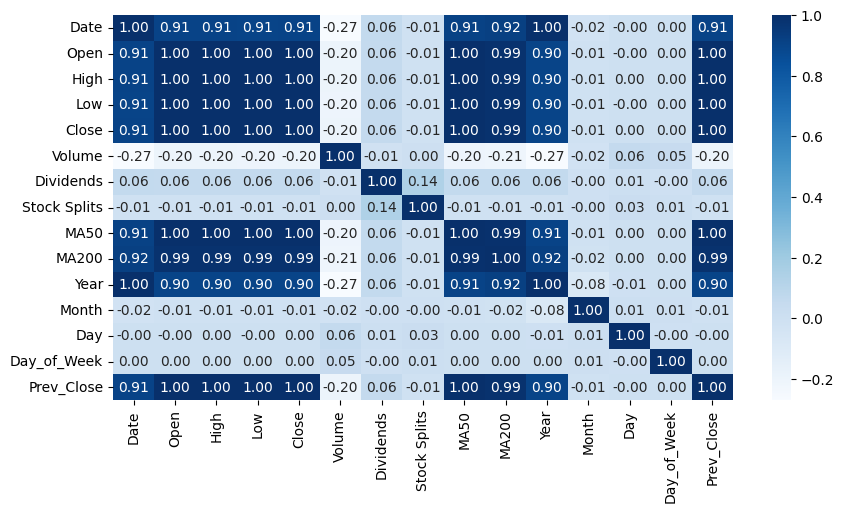

In [19]:

corel=data.corr()

### Correlation of features with the target variable
correlation_with_close =data.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

plt.figure(figsize=(10, 5))
sns.heatmap(corel,annot= True,cmap= "Blues",fmt=".2f")
plt.show()


### Time series of stock prices

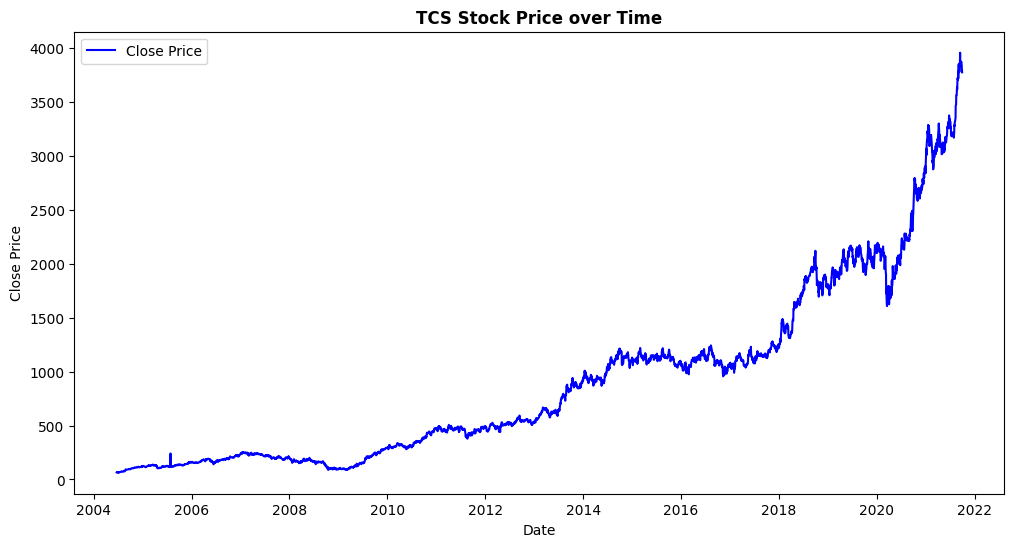

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

### Volume, Dividends, Stock Splits

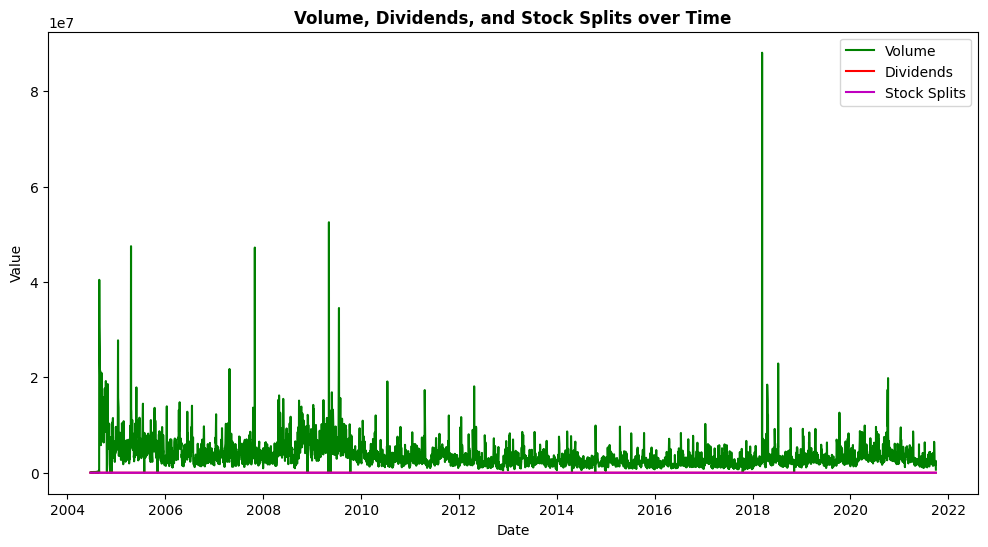

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='g')
plt.plot(data['Date'], data['Dividends'], label='Dividends',color='r')
plt.plot(data['Date'], data['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

### Close vs Volume

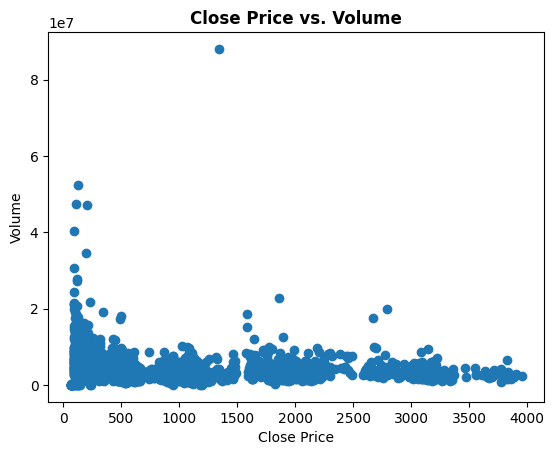

In [21]:
plt.scatter(data['Close'], data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

### Dividends vs. Close Price

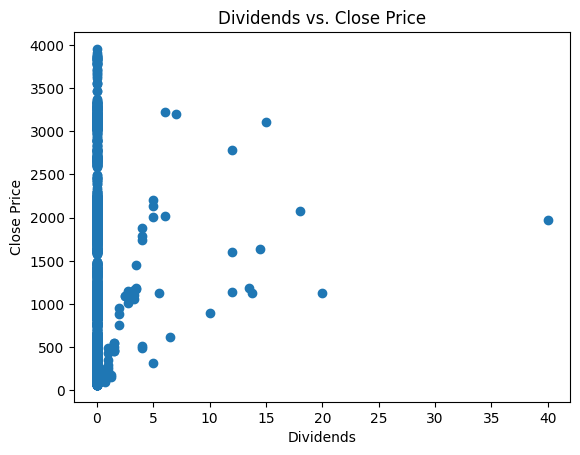

In [22]:
plt.scatter(data['Dividends'], data['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

### Stock Splits vs. Close Price

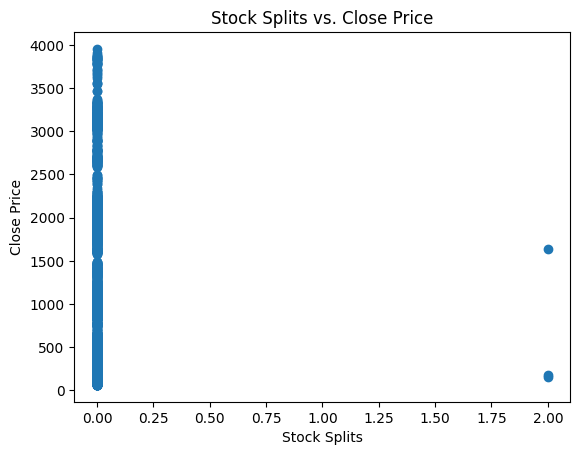

In [23]:
plt.scatter(data['Stock Splits'], data['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

### Moving Averages

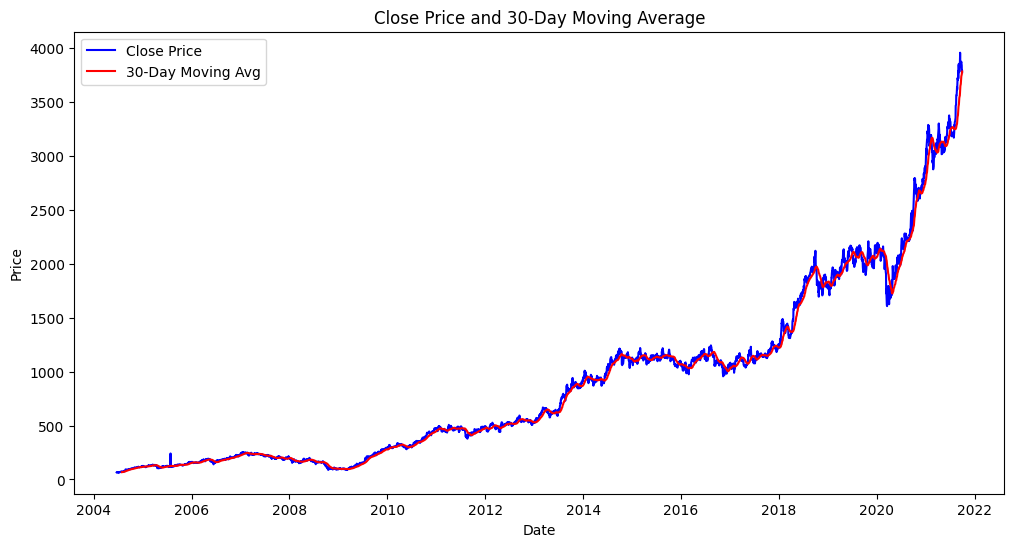

In [24]:
data['30-Day Moving Avg'] = data['Close'].rolling(window=30).mean()
# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.plot(data['Date'], data['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

### Moving Average Crossover Strategy

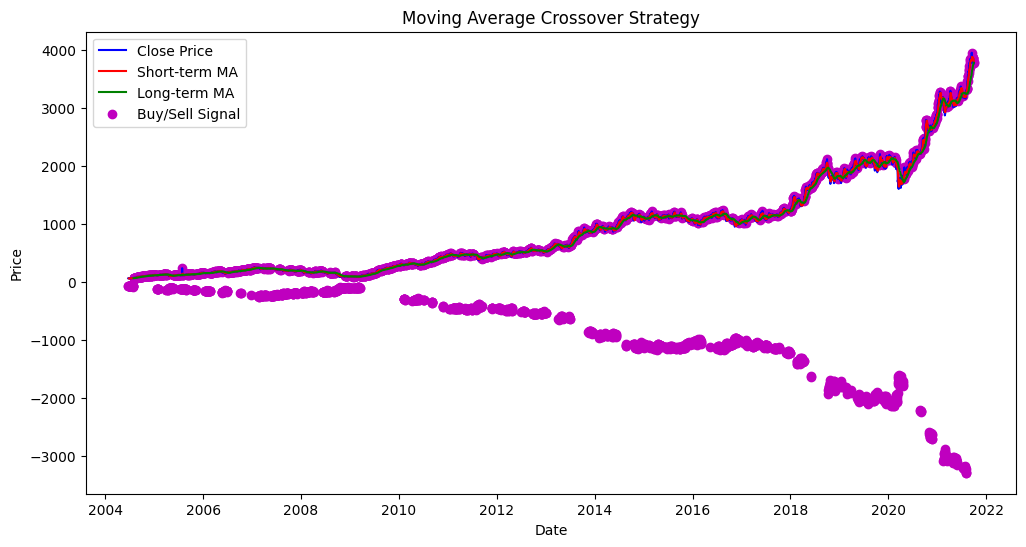

In [26]:
data['Short_MA'] = data['Close'].rolling(window=5).mean()
data['Long_MA'] = data['Close'].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
data['Signal'] = np.where(data['Short_MA'] > data['Long_MA'], 1, -1)
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price',color='b')
plt.plot(data['Date'], data['Short_MA'], label='Short-term MA',color='r')
plt.plot(data['Date'], data['Long_MA'], label='Long-term MA',color='g')
plt.scatter(data['Date'], data['Close'] * data['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

# End